In [3]:
import pandas as pd

!git clone https://github.com/taehojo/data.git
df=pd.read_csv('./data/wine.csv',header=None)

df.head()

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), done.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
X=df.iloc[:,0:12]
y=df.iloc[:,12]

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# history=model.fit(X_train,y_train,epochs=50,batch_size=500,validation_split=0.25)

In [8]:
score=model.evaluate(X_test,y_test)
print('Test accuracy:',score[1])


41/41 [==============================] - 0s 2ms/step - loss: 0.1409 - accuracy: 0.9446
Test accuracy: 0.944615364074707


In [9]:
modelpath='./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5'

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath=modelpath,verbose=1)
history=model.fit(X_train,y_train,epochs=50,batch_size=500,validation_split=0.25,verbose=0,callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.9492.hdf5

Epoch 2: saving model to ./data/model/all/02-0.9538.hdf5

Epoch 3: saving model to ./data/model/all/03-0.9515.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9515.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9538.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9538.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9538.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9554.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9554.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9531.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9592.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9562.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9569.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9554.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9585.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9608.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9592.hdf5

Epoch

In [11]:
score=model.evaluate(X_test,y_test)
print('Test accuracy:',score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9631
Test accuracy: 0.9630769491195679


In [28]:
del model

In [21]:
history=model.fit(X_train,y_train,epochs=2000,batch_size=500,validation_split=0.25,verbose=0)

In [33]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,6.585190,0.246343,3.729342,0.258462
1,2.026740,0.351039,0.493596,0.686154
2,0.383956,0.832435,0.397909,0.845385
3,0.422083,0.856043,0.440077,0.848462
4,0.416077,0.868104,0.393960,0.867692
...,...,...,...,...
255,0.048480,0.986400,0.059210,0.980769
256,0.046419,0.987426,0.064887,0.976923
257,0.047349,0.986400,0.057097,0.983077
258,0.046568,0.986400,0.060755,0.980000


In [34]:
y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']

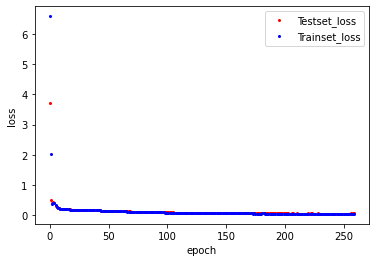

In [35]:
import matplotlib.pyplot as plt
import numpy as np
x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,'o',c='red',markersize=2,label='Testset_loss')
plt.plot(x_len,y_loss,'o',c='blue',markersize=2,label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
modelpath='./data/early_stop.hdf5'
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=20)
checkpointer=ModelCheckpoint(filepath=modelpath,verbose=0,monitor='val_loss',save_best_only=True)
history=model.fit(X_train,y_train,epochs=2000,batch_size=500,validation_split=0.25,verbose=1,callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 34ms/step - loss: 6.5852 - accuracy: 0.2463 - val_loss: 3.7293 - val_accuracy: 0.2585
Epoch 2/2000
8/8 [==============================] - 0s 12ms/step - loss: 2.0267 - accuracy: 0.3510 - val_loss: 0.4936 - val_accuracy: 0.6862
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.3840 - accuracy: 0.8324 - val_loss: 0.3979 - val_accuracy: 0.8454
Epoch 4/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.4221 - accuracy: 0.8560 - val_loss: 0.4401 - val_accuracy: 0.8485
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.4161 - accuracy: 0.8681 - val_loss: 0.3940 - val_accuracy: 0.8677
Epoch 6/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.3562 - accuracy: 0.8904 - val_loss: 0.3220 - val_accuracy: 0.8938
Epoch 7/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.2870 - accuracy: 0.9086 - val_loss: 0.2599 - val_accuracy: 0.9162
Epoch 8/2000
8/

In [32]:
score=model.evaluate(X_test,y_test)
print('Test accuracy:',score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9862
Test accuracy: 0.9861538410186768
